In [1]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()
               

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])


Rows     :  768
Columns  :  9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
268/500

0.536

In [8]:
X=df.drop('Outcome',axis='columns')
y=df.Outcome

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,stratify=y,random_state=10)

In [11]:
X_train.shape

(576, 8)

In [12]:
X_test.shape

(192, 8)

In [13]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [14]:
201/375

0.536

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTreeClassifier(),X,y,cv=5)
scores

array([0.68181818, 0.62987013, 0.7012987 , 0.77777778, 0.70588235])

In [16]:
scores.mean()

0.6993294287411935

In [17]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(
          base_estimator=DecisionTreeClassifier(),
          n_estimators=100,
          max_samples=0.8,
          oob_score=True,
          random_state=0
)
bag_model.fit(X_train,y_train)
bag_model.oob_score_

0.7534722222222222

In [18]:
bag_model.score(X_test,y_test)


0.7760416666666666

In [19]:
bag_model=BaggingClassifier(
          base_estimator=DecisionTreeClassifier(),
          n_estimators=100,
          max_samples=0.8,
          oob_score=True,
          random_state=0
)
scores=cross_val_score(bag_model,X,y, cv=5)
scores.mean()

0.7578728461081402

# Gradient Boosting

## Removing Irrelavent Variable 


In [20]:
# #Employee Numeric columns
import numpy as np   

df_num = df[df.select_dtypes(include=[np.number]).columns.tolist()]
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [21]:
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [22]:
from sklearn.preprocessing import LabelEncoder 
df_dummies = df[df.select_dtypes(include=['object']).columns.tolist()]
df_dummies.head(3)

""
0
1
2


In [23]:
from sklearn.preprocessing import LabelEncoder
df_dummies=df_dummies.apply(LabelEncoder().fit_transform)
df_dummies.head(3)
# label in ascending order

Series([], dtype: float64)

In [24]:
df_combined = pd.concat([df_num, df_dummies],axis=1)
df_combined.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN


### Model 2 -GBM (Gradient boosting)

In [25]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [4, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [26]:
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [4, 5],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [10, 50]},
             scoring='accuracy', verbose=1)

In [27]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 4, 'min_samples_leaf': 200, 'min_samples_split': 50, 'n_estimators': 50}


In [28]:

final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.6, max_depth=4, min_samples_leaf=200,
                           min_samples_split=50, n_estimators=50)

In [29]:
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [30]:
train_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

# Confusion Matrix Train Data (2 Model)

In [31]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       375
           1       0.71      0.60      0.65       201

    accuracy                           0.78       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



# Confusion Matrix Test Data (2 Model) 

In [32]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       125
           1       0.71      0.67      0.69        67

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



# Importance Feature

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  

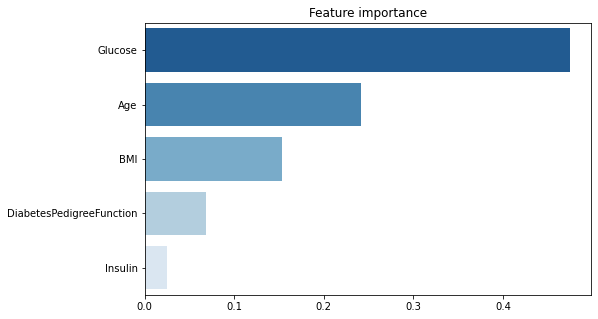

In [34]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# Gradiant Boosting Tree

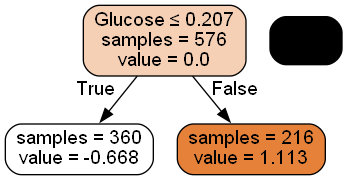

In [35]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[0, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
Outcome=['1','0']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=Outcome,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Gradient Boosting is Finished